In [1]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.40MB/s]
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.40MB/s]


In [2]:
!mv california-housing-prices.zip data/
!unzip data/california-housing-prices.zip -d data/

Archive:  data/california-housing-prices.zip
  inflating: data/housing.csv        


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


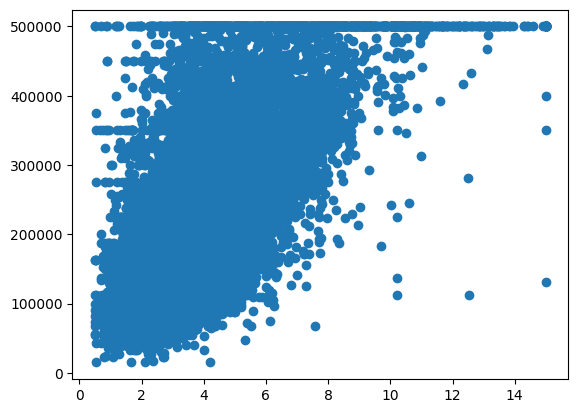

In [22]:
x_values = housing['median_income']
y_values = housing['median_house_value']

plt.scatter(x_values, y_values)
plt.show()

In [23]:
print(x_values.isna().sum())

print(y_values.isna().sum())

0
0


In [24]:
x_values.describe()

count    20433.000000
mean         3.871162
std          1.899291
min          0.499900
25%          2.563700
50%          3.536500
75%          4.744000
max         15.000100
Name: median_income, dtype: float64

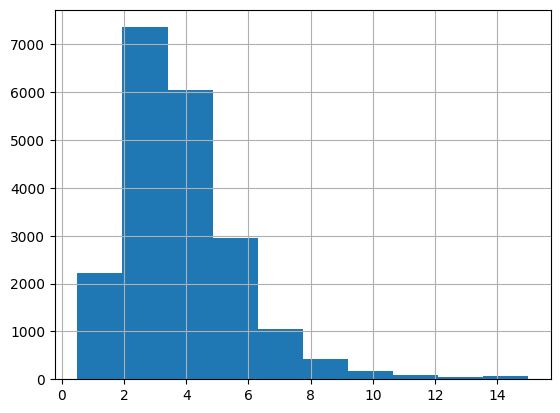

In [25]:
x_values.hist()
plt.show()


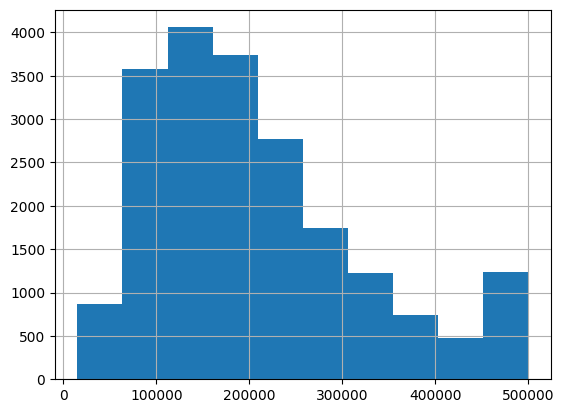

In [26]:
y_values.hist()
plt.show()


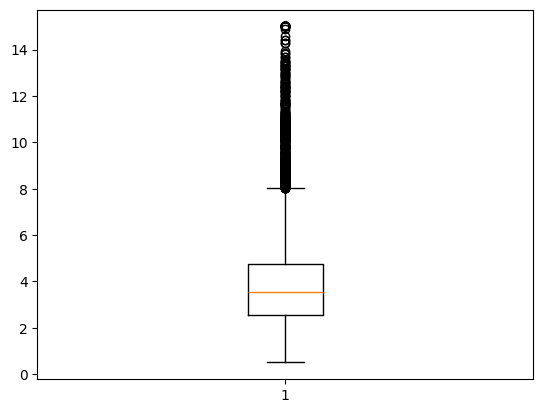

In [27]:
 # boxplot
plt.boxplot(x_values)
plt.show()


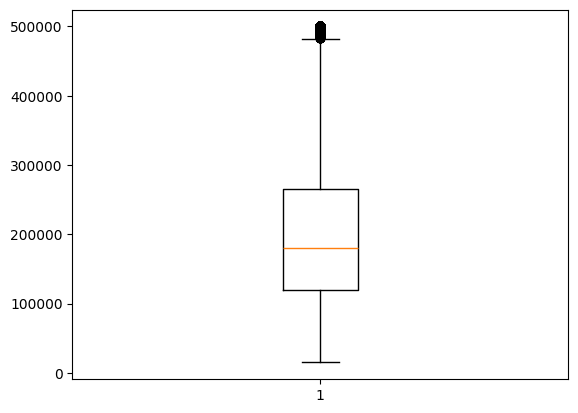

In [28]:
plt.boxplot(y_values)
plt.show()


In [31]:
x_values.describe()

count    20433.000000
mean         3.871162
std          1.899291
min          0.499900
25%          2.563700
50%          3.536500
75%          4.744000
max         15.000100
Name: median_income, dtype: float64

In [32]:
y_values.describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [38]:
# normalize the data using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_values_normalized = scaler.fit_transform(np.array(x_values).reshape(-1, 1))
y_values_normalized = scaler.fit_transform(np.array(y_values).reshape(-1, 1))


In [42]:
# create a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_values_normalized, y_values_normalized)

print(model.coef_)
print(model.intercept_)

[[0.68835548]]
[-9.17086076e-17]


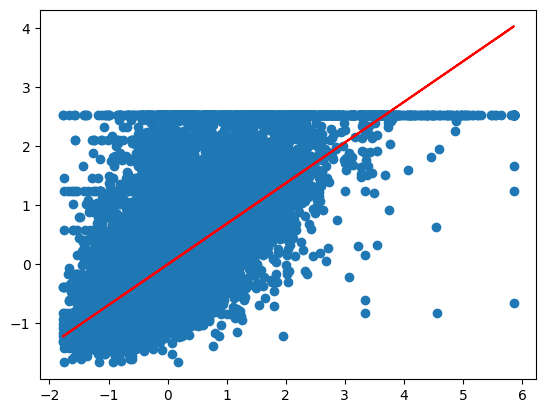

In [43]:
# plot the model
plt.scatter(x_values_normalized, y_values_normalized)
plt.plot(x_values_normalized, model.predict(x_values_normalized), color='red')
plt.show()


In [44]:
# evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_values_normalized, model.predict(x_values_normalized))
print(mse)


0.5261667396023288


In [ ]:
# create a new